# Testes LLM multi-modal

A ideia deste notebook é testar recursos dos modelos de LLM multi-modais, ou seja, modelos que possuem capacidades relacionadas a texto e imagens. A inspiração dos testes é relacionada a possibilidade de uso destes modelos multi-modais em combinação com modelos de recomendação, como demonstrado no diagrama a seguir:

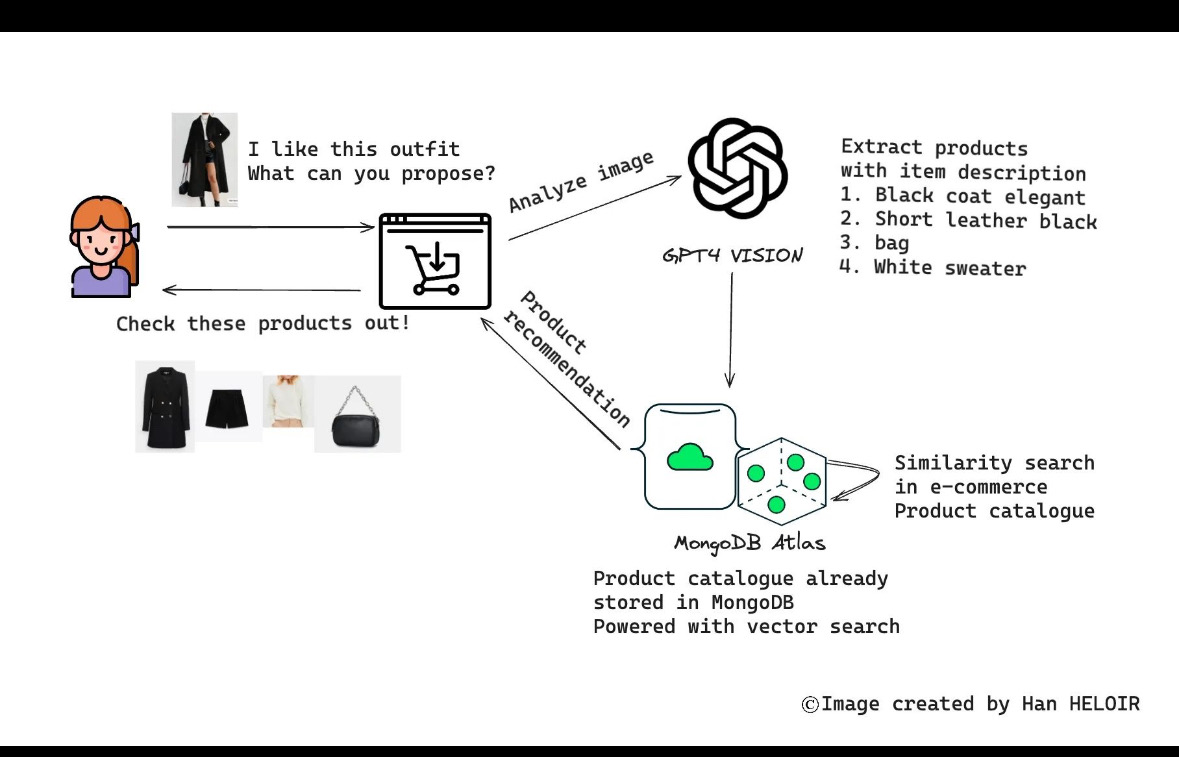

Primeiro vamos fazer alguns testes básicos com o modelo multi-modal e depois vamos criar uma prova de conceito que seja similar a idéia de recomendação de produtos com base na vestimenta.

</br>
</br>

##  1 - Vamos preparar o ambiente para os testes

Escolhi testar o novo modelos disponibilidado pelo Google, chamado gemini.

Para facilitar vou combinar com o uso do llama-index, o que também facilita fazer o intercâmbio e combinação com outros modelos em outros testes futuros.

In [ ]:
# instala bibliotecas
#!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client

In [ ]:
# importa bibliotecas
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from llama_index.multi_modal_llms.gemini import GeminiMultiModal
from llama_index.multi_modal_llms.generic_utils import load_image_urls

In [ ]:
# define api key para uso do gemini
%env GOOGLE_API_KEY=...
GOOGLE_API_KEY = "..."
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:
# instancia modelo gemini pro
gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

## 2 - Vamos começar por testes básicos para ver as capacidades do modelo.



### 🤔 Por exemplo, é possível identificar os produtos contidos em um banner publicitário?

Vamos testar com um banner de produtos da samsung.


https://storage.googleapis.com/imagens_mm/vivo-galaxy-z-flip4-desk-2211-1920x471.jpg


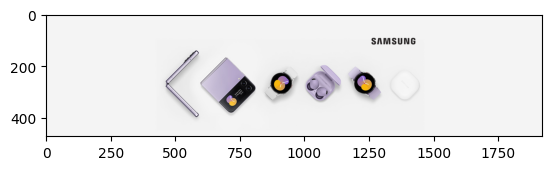

In [ ]:
# lista de imagens
urls_imagens_1 = ["https://storage.googleapis.com/imagens_mm/vivo-galaxy-z-flip4-desk-2211-1920x471.jpg"]

for image in urls_imagens_1:
    print(image)
    img_response = requests.get(image)
    img = Image.open(BytesIO(img_response.content))
    plt.figure()
    plt.imshow(img)
    plt.show()

In [ ]:
# prepara imagens para o modelo
docs_imagens_1 = load_image_urls(urls_imagens_1)

# busca descrição dos produtos contidos na imagem
resposta_modelo_1 = gemini_pro.complete(
    prompt="Identifique os produtos nesta imagem.",
    image_documents=docs_imagens_1,
)

print(resposta_modelo_1)

#### **Resultado:**


 A imagem mostra os seguintes produtos Samsung:

- Galaxy Z Flip4
- Galaxy Watch5
- Galaxy Buds2 Pro
- Galaxy Buds Live

*Boa! O modelo foi capaz de identificar os itens que estão na imagem.* 😃

</br>
</br>

### Agora vamos ver se é possível gerar um texto descrivo para para este banner, estas que usamos no texto alternativo.

In [ ]:
resposta_modelo_1b = gemini_pro.complete(
    prompt="Descreva as imagens como um texto alternativo",
    image_documents=docs_imagens_1,
)

print(resposta_modelo_1b)

 A imagem mostra, da esquerda para a direita, um smartphone Samsung Galaxy Z Flip3 5G fechado, um relógio inteligente Samsung Galaxy Watch4 Classic, um par de fones de ouvido Samsung Galaxy Buds2 Pro e um estojo de carregamento sem fio Samsung Galaxy Buds2 Pro. Todos os itens são da cor Bora Purple.


#### **Resultado:**

 A imagem mostra, da esquerda para a direita, um smartphone Samsung Galaxy Z Flip3 5G fechado, um relógio inteligente Samsung Galaxy Watch4 Classic, um par de fones de ouvido Samsung Galaxy Buds2 Pro e um estojo de carregamento sem fio Samsung Galaxy Buds2 Pro. Todos os itens são da cor Bora Purple.

</br>
</br>

## 3 - É possível comparar duas imagens similares e diferenciar o contexto?

### Vamos testar com dois banners publicitários de smartwatchs:

https://storage.googleapis.com/imagens_mm/1440x353-Banner-secundario2v2.jpg


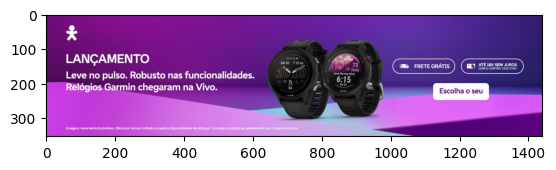

https://storage.googleapis.com/imagens_mm/1440x353-Banner-Secund-rio-galaxy-watch.jpg


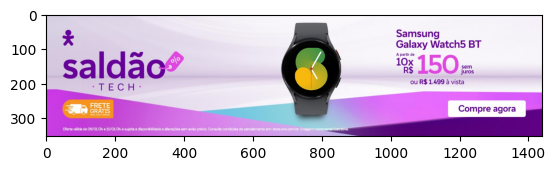

In [ ]:
urls_imagens_2 = [
    "https://storage.googleapis.com/imagens_mm/1440x353-Banner-secundario2v2.jpg",
    "https://storage.googleapis.com/imagens_mm/1440x353-Banner-Secund-rio-galaxy-watch.jpg",
]

for image in urls_imagens_2:
    print(image)
    img_response = requests.get(image)
    img = Image.open(BytesIO(img_response.content))
    plt.figure()
    plt.imshow(img)
    plt.show()

In [ ]:
# prepara imagens para o modelo
docs_imagens_2 = load_image_urls(urls_imagens_2)

resposta_modelo_2 = gemini_pro.complete(
    prompt="Existe alguma relação entre essas imagens? Descreva cada uma delas",
    image_documents=docs_imagens_2,
)

print(resposta_modelo_2)

 As duas imagens são propagandas de relógios inteligentes. A primeira imagem é um anúncio da chegada dos relógios Garmin na loja Vivo. A segunda imagem é um anúncio de um relógio inteligente Samsung Galaxy Watch5 BT.


#### **Resultado:**

 As duas imagens são propagandas de relógios inteligentes. A primeira imagem é um anúncio da chegada dos relógios Garmin na loja Vivo. A segunda imagem é um anúncio de um relógio inteligente Samsung Galaxy Watch5 BT.

 </br>
 </br>

### 🤔 É possível extrair as condições de compra do galaxy watch?

In [ ]:
# imagens
urls_imagens_3 = [
    "https://storage.googleapis.com/imagens_mm/1440x353-Banner-Secund-rio-galaxy-watch.jpg",
    ]

# prepara imagens para o modelo
docs_imagens_3 = load_image_urls(urls_imagens_3)

resposta_modelo_3 = gemini_pro.complete(
    prompt="Identifique os produtos contidos na imagem e as condições de venda se houver.",
    image_documents=docs_imagens_3,
)

print(resposta_modelo_3)

 O produto contido na imagem é o Samsung Galaxy Watch5 BT. As condições de venda são:
- À vista: R$ 1.499,00
- Parcelado: 10x de R$ 150,00 sem juros


### Resultado:

 O produto contido na imagem é o Samsung Galaxy Watch5 BT. As condições de venda são:
- À vista: R\$ 1.499,00
- Parcelado: 10x de R$ 150,00 sem juros

</br>
</br>

## 4 - ⌚ Podemos recomendar smartwatchs considerando o "look" de uma pessoa?


A idéia é usar a IA para descrever o estilo smartwatchs, como cores, design e materiais. Estas informações serão usadas depois para sugerir relógios mais adequados para um estilo de roupas (look).

Vamos fazer da seguinte forma:
1. Pedir para a IA descrever um conjunto de relógios.
2. Descrever um estilo de roupas e identificar o relógio mais adequado.




In [ ]:
# relação das imagens de smartwatchs
urls_imagens_4 = [
    "https://storage.googleapis.com/imagens_mm/relogios/galaxy_watch5_bt_prata.jpeg",
    "https://storage.googleapis.com/imagens_mm/relogios/galaxy_watch6_bege.jpg",
    "https://storage.googleapis.com/imagens_mm/relogios/galaxy_watch6_classic.jpg",
    "https://storage.googleapis.com/imagens_mm/relogios/samsung_watch_bege.jpeg",
    "https://storage.googleapis.com/imagens_mm/relogios/samsung_watch_classic.jpeg",
    "https://storage.googleapis.com/imagens_mm/relogios/samsung_watch_lilas.jpeg",
    "https://storage.googleapis.com/imagens_mm/relogios/samsung_watch_vermelho.jpeg"
]

# Inicializa o dicionário
descricoes = {}

texto_prompt = """Descreva apenas o relógio da imagem considerando aspectos como cores, design, estilo e materiais de construção.
                  Não identifique características técnicas, foque no design e estilo em relação à moda e combinação com roupas.
                  Não incluir características técnicas, apenas estilo, cores, materiais e design considerando apenas o relógio mostrado na imagem"""

for image in urls_imagens_4:
  # Carrega a imagem
  imagens = load_image_urls([image])
  # Gera a descrição do relógio
  descricao_relogio = gemini_pro.complete(
      prompt=texto_prompt,
      image_documents=imagens,
      )
  # Armazena a descrição usando a URL da imagem como chave
  descricoes[image] = descricao_relogio

In [ ]:
str_descricoes = ""
for chave, valor in descricoes.items():
  str_descricoes += f"{chave}: {valor}\n"

### Vamos ver como ficou a descrição de cada relógio gerada pela IA:

https://storage.googleapis.com/imagens_mm/relogios/galaxy_watch5_bt_prata.jpeg


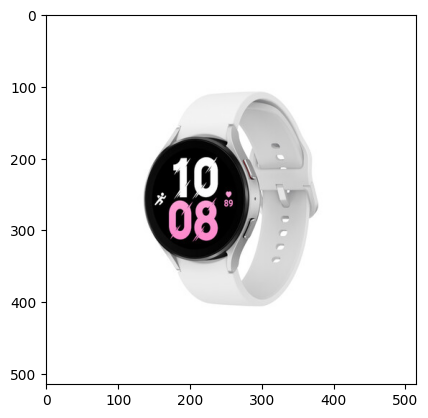

 O relógio inteligente Samsung Galaxy Watch5 possui um design minimalista e elegante, com uma tela AMOLED de 1,4 polegadas e resolução de 450 x 450 pixels. O relógio é feito de alumínio e aço inoxidável, com uma pulseira de silicone. O Galaxy Watch5 está disponível nas cores preto, prata, azul e rosa.

O relógio possui um mostrador personalizável, com uma variedade de opções de relógio analógico e digital. O Galaxy Watch5 também possui uma série de recursos de saúde e fitness, incluindo um monitor de frequência cardíaca, um monitor de pressão arterial, um monitor de sono e um rastreador de atividade.

O Galaxy Watch5 é um relógio inteligente elegante e funcional, com uma variedade de recursos que o tornam uma ótima opção para quem procura um relógio inteligente com estilo.



https://storage.googleapis.com/imagens_mm/relogios/galaxy_watch6_bege.jpg


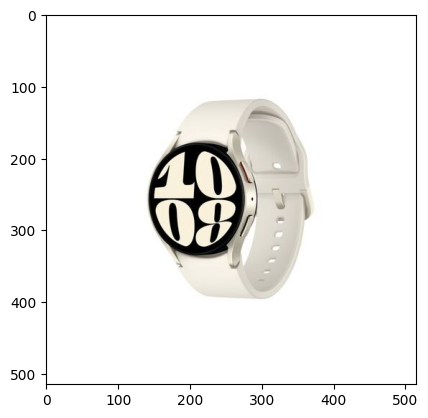

 O relógio tem um design minimalista e elegante, com uma caixa redonda de aço inoxidável e uma pulseira de silicone branca. O mostrador do relógio é digital, com números grandes e fáceis de ler. O relógio é resistente à água e tem uma bateria de longa duração.



https://storage.googleapis.com/imagens_mm/relogios/galaxy_watch6_classic.jpg


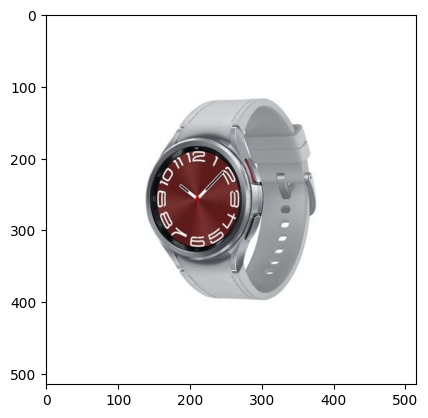

 O relógio tem um design moderno e minimalista. A caixa é feita de aço inoxidável e a pulseira é de couro branco. O mostrador é redondo e tem um acabamento prateado. Os números são vermelhos e os ponteiros são brancos. O relógio é resistente à água e tem uma bateria de longa duração.



https://storage.googleapis.com/imagens_mm/relogios/samsung_watch_bege.jpeg


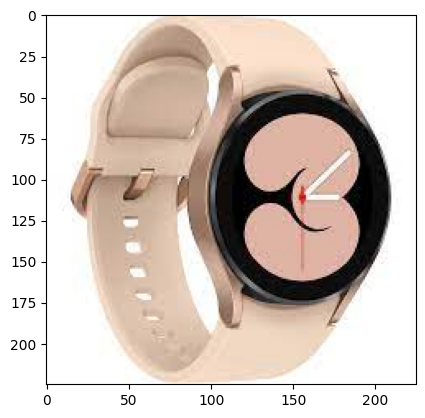

 O relógio tem um design minimalista e elegante, com uma caixa redonda de metal e uma pulseira de silicone. O mostrador é digital e tem um fundo branco com algarismos e ponteiros pretos. O relógio é resistente à água e tem uma bateria de longa duração.



https://storage.googleapis.com/imagens_mm/relogios/samsung_watch_classic.jpeg


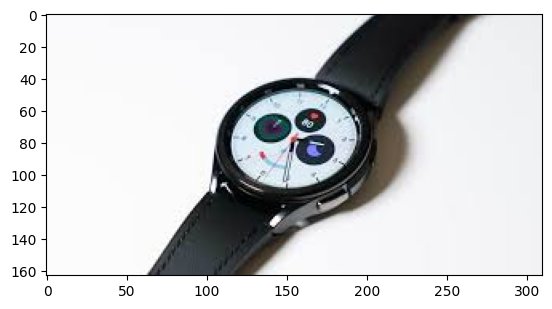

 O relógio tem um design moderno e minimalista, com uma caixa redonda de aço inoxidável e uma pulseira de couro preta. O mostrador é digital e tem um acabamento espelhado. O relógio é resistente à água e tem uma bateria de longa duração.



https://storage.googleapis.com/imagens_mm/relogios/samsung_watch_lilas.jpeg


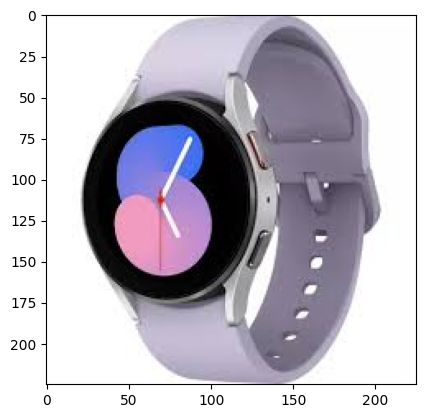

 O relógio tem um design moderno e elegante, com uma caixa de alumínio e uma pulseira de silicone. O mostrador é redondo e tem um acabamento prateado, com um visor digital que mostra as horas, minutos e segundos. O relógio é resistente à água e tem uma bateria de longa duração.



https://storage.googleapis.com/imagens_mm/relogios/samsung_watch_vermelho.jpeg


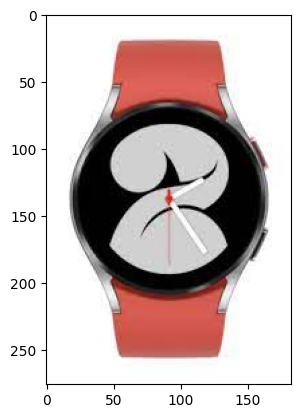

 O relógio tem um design moderno e minimalista. É redondo, com uma tela preta e uma moldura prateada. A pulseira é de silicone vermelha e o fecho é de metal prateado. O relógio é resistente à água e tem uma bateria de longa duração.





In [ ]:
for image, descricao in descricoes.items():
    print(image)
    img_response = requests.get(image)
    img = Image.open(BytesIO(img_response.content))
    plt.figure()
    plt.imshow(img)
    plt.show()
    print(descricao)
    print("")
    print("")
    print("")

### Agora vamos testar com alguns estilos de roupas

### 4.1 - Estilo A

Vamos apresentar uma imagem com um estilo de vestimenta e pedir para o modelo sugerir um relógio que combine com este estilo.

https://storage.googleapis.com/imagens_mm/looks/look1.jpg


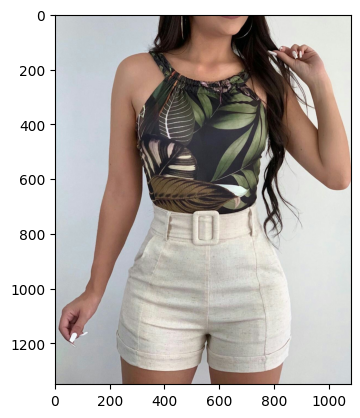

In [ ]:
urls_imagens_5 = ["https://storage.googleapis.com/imagens_mm/looks/look1.jpg",]

for image in urls_imagens_5:
    print(image)
    img_response = requests.get(image)
    img = Image.open(BytesIO(img_response.content))
    plt.figure()
    plt.imshow(img)
    plt.show()

In [ ]:
# prepara imagens
docs_imagens_5 = load_image_urls(urls_imagens_5)

# processa modelo
resposta_modelo_5 = gemini_pro.complete(
    prompt="Descreva as roupas e o estilo identificado na imagem. Então considere a lista de relógios a seguir e indique um relógio que combinaria com as roupas e o estilo pessoal identificado na imagem. Lista de relógios: " + str_descricoes,
    image_documents=docs_imagens_5,
    )

print(resposta_modelo_5)

 A imagem mostra uma mulher vestindo um top estampado com folhas verdes e pretas, um short bege de cintura alta e um cinto marrom. O estilo da mulher é casual e elegante.

O relógio que melhor combina com as roupas e o estilo da mulher é o Samsung Watch Bege. O relógio tem um design minimalista e elegante, com uma caixa redonda de metal e uma pulseira de silicone. O mostrador é digital e tem um fundo branco com algarismos e ponteiros pretos. O relógio é resistente à água e tem uma bateria de longa duração.


#### **Resultado:**

A imagem mostra uma mulher vestindo um top estampado com folhas verdes e pretas, um short bege de cintura alta e um cinto marrom. O estilo da mulher é casual e elegante.

O relógio que melhor combina com as roupas e o estilo da mulher é o Samsung Watch Bege. O relógio tem um design minimalista e elegante, com uma caixa redonda de metal e uma pulseira de silicone. O mostrador é digital e tem um fundo branco com algarismos e ponteiros pretos. O relógio é resistente à água e tem uma bateria de longa duração.

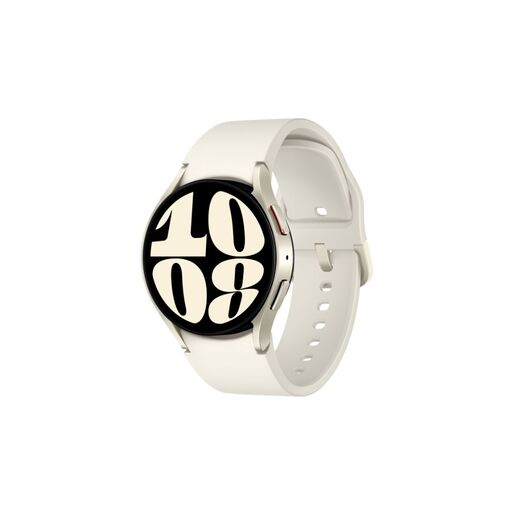

### 4.2 - Estilo B

Vamos testar com fotos em espelho de um provador.

https://storage.googleapis.com/imagens_mm/looks/look4.jpg


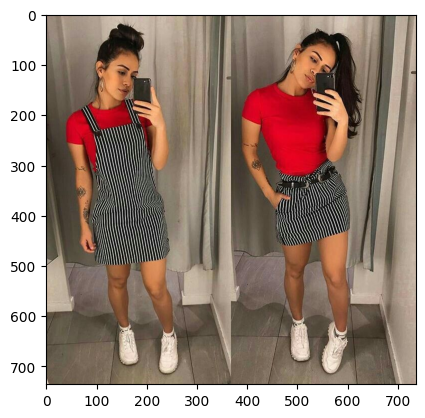

In [ ]:
urls_imagens_6 = ["https://storage.googleapis.com/imagens_mm/looks/look4.jpg",]

for image in urls_imagens_6:
    print(image)
    img_response = requests.get(image)
    img = Image.open(BytesIO(img_response.content))
    plt.figure()
    plt.imshow(img)
    plt.show()

In [ ]:
# prepara imagens
docs_imagens_6 = load_image_urls(urls_imagens_6)

# processa modelo
resposta_modelo_6 = gemini_pro.complete(
    prompt="Descreva as roupas e o estilo identificado na imagem. Então considere a lista de relógios a seguir e indique um relógio que combinaria com as roupas e o estilo pessoal identificado na imagem. Lista de relógios: " + str_descricoes,
    image_documents=docs_imagens_6,
    )

print(resposta_modelo_6)

 A imagem mostra uma jovem usando um vestido curto listrado preto e branco, com uma camiseta vermelha por baixo. Ela também está usando um cinto preto e tênis brancos. O estilo da jovem é casual e despojado.

O relógio que melhor combinaria com as roupas e o estilo pessoal identificado na imagem é o Samsung Watch vermelho. O relógio tem um design moderno e minimalista, com uma caixa de alumínio e uma pulseira de silicone. O mostrador é redondo e tem um acabamento prateado, com um visor digital que mostra as horas, minutos e segundos. O relógio é resistente à água e tem uma bateria de longa duração.


#### **Resultado**:

A imagem mostra uma jovem usando um vestido curto listrado preto e branco, com uma camiseta vermelha por baixo. Ela também está usando um cinto preto e tênis brancos. O estilo da jovem é casual e despojado.

O relógio que melhor combinaria com as roupas e o estilo pessoal identificado na imagem é o Samsung Watch vermelho. O relógio tem um design moderno e minimalista, com uma caixa de alumínio e uma pulseira de silicone. O mostrador é redondo e tem um acabamento prateado, com um visor digital que mostra as horas, minutos e segundos. O relógio é resistente à água e tem uma bateria de longa duração.


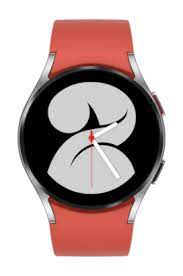

### 4.3 - Estilo C

Agora vamos testar em roupas masculinas

https://storage.googleapis.com/imagens_mm/looks/look7.jpg


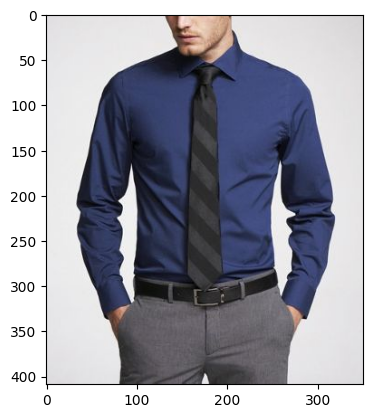

In [ ]:
urls_imagens_7 = ["https://storage.googleapis.com/imagens_mm/looks/look7.jpg",]

for image in urls_imagens_7:
    print(image)
    img_response = requests.get(image)
    img = Image.open(BytesIO(img_response.content))
    plt.figure()
    plt.imshow(img)
    plt.show()

In [ ]:
# prepara imagens
docs_imagens_7 = load_image_urls(urls_imagens_7)

# processa modelo
resposta_modelo_7 = gemini_pro.complete(
    prompt="Descreva as roupas e o estilo identificado na imagem. Então considere a lista de relógios a seguir e indique um relógio que combinaria com as roupas e o estilo pessoal identificado na imagem. Lista de relógios: " + str_descricoes,
    image_documents=docs_imagens_7,
    )

print(resposta_modelo_7)

 A imagem mostra um homem vestindo uma camisa azul escura, uma gravata preta e um cinto preto. Ele está usando calças cinza e sapatos pretos. O homem tem um estilo clássico e elegante.

O relógio que melhor combina com as roupas e o estilo do homem é o Samsung Watch Classic. Este relógio tem um design clássico e elegante, com uma caixa redonda de aço inoxidável e uma pulseira de couro preta. O mostrador é digital e tem um acabamento espelhado. O relógio é resistente à água e tem uma bateria de longa duração.


#### **Resultado**:

A imagem mostra um homem vestindo uma camisa azul escura, uma gravata preta e um cinto preto. Ele está usando calças cinza e sapatos pretos. O homem tem um estilo clássico e elegante.

O relógio que melhor combina com as roupas e o estilo do homem é o Samsung Watch Classic. Este relógio tem um design clássico e elegante, com uma caixa redonda de aço inoxidável e uma pulseira de couro preta. O mostrador é digital e tem um acabamento espelhado. O relógio é resistente à água e tem uma bateria de longa duração.

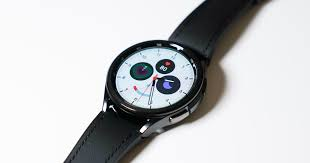